# **Visualización de Datos con Seaborn**

## Importación de la librería

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [206]:
# Datos simples
df = pd.DataFrame({
    "x": range(1, 11),
    "y": [2, 3, 5, 6, 8, 9, 11, 13, 14, 16]
})

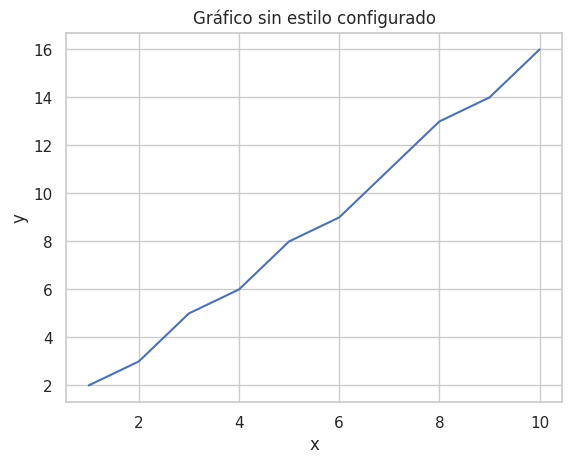

In [207]:
sns.lineplot(data=df, x="x", y="y")
plt.title("Gráfico sin estilo configurado")
plt.show()


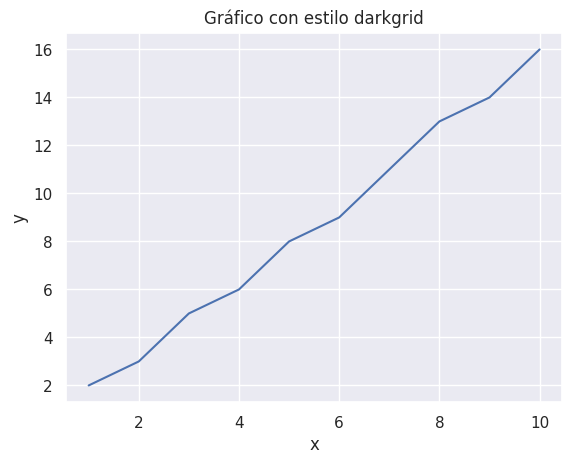

In [208]:
sns.set(style="darkgrid")

sns.lineplot(data=df, x="x", y="y")
plt.title("Gráfico con estilo darkgrid")
plt.show()


## Parámetros comunes

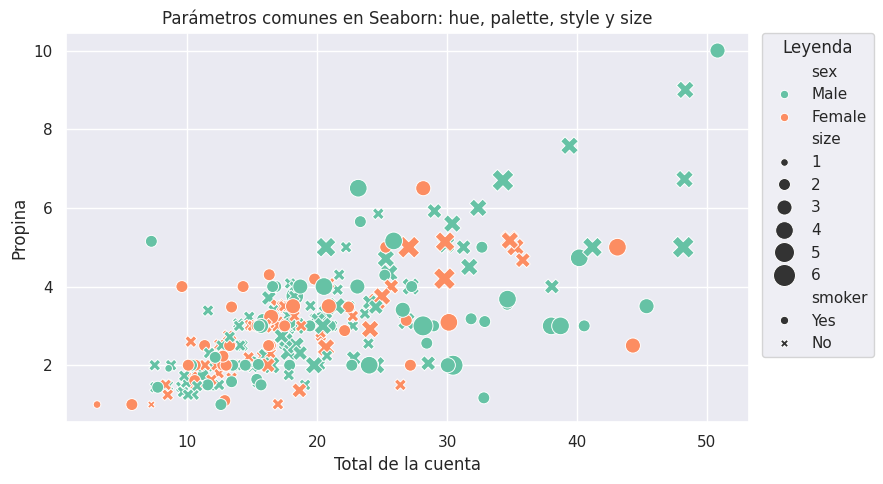

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

fig, ax = plt.subplots(figsize=(9,5))

sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="sex",       # Seaborn toma los valores de la variable sex y decide qué color usar para cada punto según el valor que tenga esa fila.
    style="smoker",  # Resultado: por ejemplo círculos para “No” y otra forma para “Yes”
    size="size",     # Seaborn toma los valores de una columna y los usa para decidir qué tan grande se dibuja cada punto.
    sizes=(30, 250), # Controla el rango de tamaños que Seaborn usará para dibujar los puntos.
    palette="Set2",  # Define la paleta de colores usada para hue
    ax=ax
)

ax.set_title("Parámetros comunes en Seaborn: hue, palette, style y size")
ax.set_xlabel("Total de la cuenta")
ax.set_ylabel("Propina")

# mueve la leyenda fuera
ax.legend(
    title="Leyenda",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0
)

plt.tight_layout()
plt.show()


* hue separa por color (categorías: hombre/mujer)
* style separa por forma (categorías: fumador/no fumador)
* size cambia el tamaño (numérico: el tamaño del punto representa cuántas personas hay en la mesa.)
* palette define la paleta


## Gráficos de distribución

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

tips = sns.load_dataset("tips")
x = tips["total_bill"]  # variable numérica para distribución


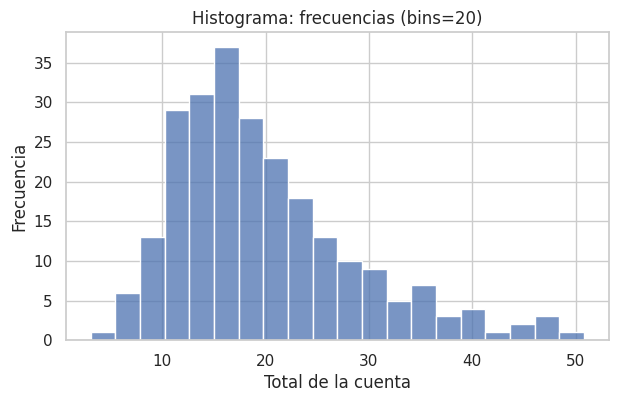

In [212]:
plt.figure(figsize=(7,4))
sns.histplot(x, bins=20)
plt.title("Histograma: frecuencias (bins=20)")
plt.xlabel("Total de la cuenta")
plt.ylabel("Frecuencia")
plt.show()


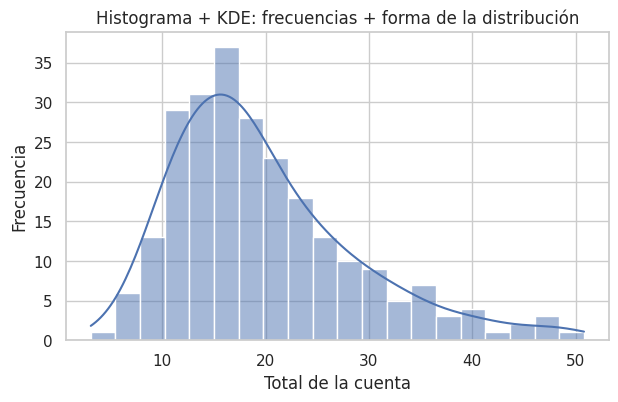

In [213]:
# KDE = Kernel Density Estimation (Estimación de Densidad por Kernel)
# El KDE toma tus datos (que son discretos/puntuales) y crea una curva continua que representa cómo se distribuyen
plt.figure(figsize=(7,4))
sns.histplot(x, bins=20, kde=True)
plt.title("Histograma + KDE: frecuencias + forma de la distribución")
plt.xlabel("Total de la cuenta")
plt.ylabel("Frecuencia")
plt.show()


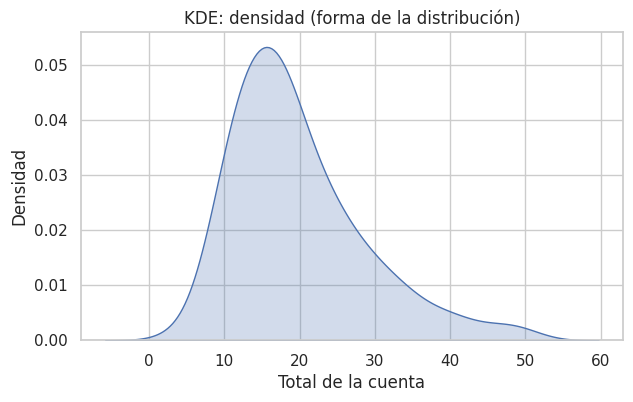

In [214]:
plt.figure(figsize=(7,4))
sns.kdeplot(x, fill=True)
plt.title("KDE: densidad (forma de la distribución)")
plt.xlabel("Total de la cuenta")
plt.ylabel("Densidad")
plt.show()


/tmp/ipython-input-1790366231.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



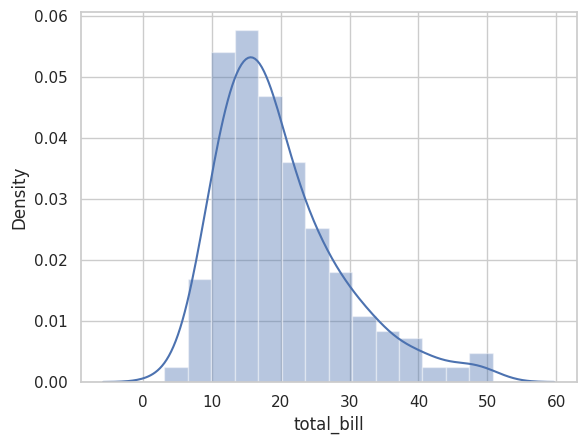

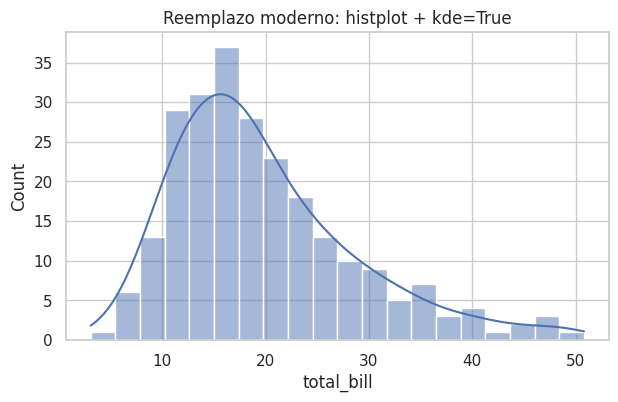

In [215]:
# Forma antigua (obsoleta desde seaborn 0.11)
sns.distplot(x)  # probablemente te mostrará warning o no existirá según versión
plt.show()

# Forma actual recomendada
plt.figure(figsize=(7,4))
sns.histplot(x, bins=20, kde=True)
plt.title("Reemplazo moderno: histplot + kde=True")
plt.show()


| Aspecto                     | `plt.hist` (Matplotlib)     | `sns.histplot` (Seaborn)                       |
| --------------------------- | --------------------------- | ---------------------------------------------- |
| Librería                    | Matplotlib                  | Seaborn                                        |
| Nivel de abstracción        | Bajo (control directo)      | Alto (más automático)                          |
| Entrada de datos            | Arrays o Series             | DataFrame + nombres de columnas                |
| Sintaxis típica             | `plt.hist(x)`               | `sns.histplot(data=df, x="col")`               |
| Comparar grupos             | Manual (varios `plt.hist`)  | Directo con `hue=`                             |
| Curva de densidad (KDE)     | No nativo                   | Sí (`kde=True`)                                |
| Normalización               | `density=True`              | `stat="density"`, `"probability"`, `"percent"` |
| Manejo de bins              | Manual (`bins=`)            | Manual o automático                            |
| Leyendas                    | Manual                      | Automática                                     |
| Estética por defecto        | Básica                      | Más cuidada                                    |
| Integración con otros plots | Media                       | Muy buena                                      |
| Ideal para                  | Casos simples, control fino | Análisis exploratorio y docencia               |


## Gráficos de dispersión y correlación: jointplot

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")


**Jointplot básico (scatter)**

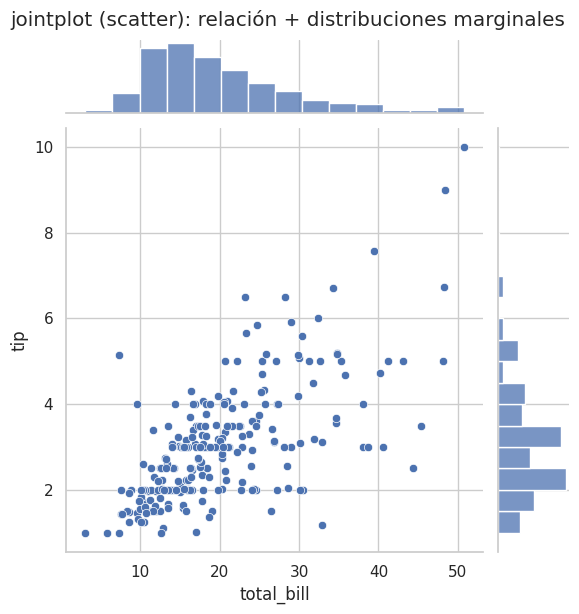

In [217]:
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="scatter",
    height=6
)
plt.suptitle("jointplot (scatter): relación + distribuciones marginales", y=1.02)
plt.show()


**kind="kde" (densidad 2D)**

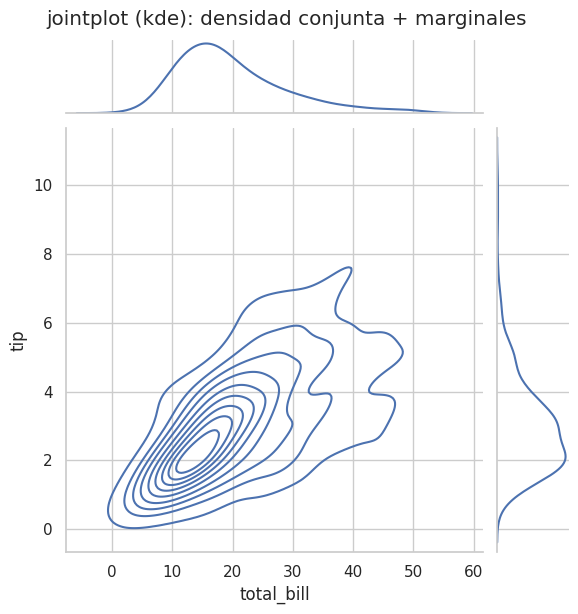

In [218]:
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="kde", # KDE significa Kernel Density Estimation (estimación de densidad por kernels)
    height=6
)
plt.suptitle("jointplot (kde): densidad conjunta + marginales", y=1.02)
plt.show()


**kind="hex" (útil cuando hay muchos puntos)**

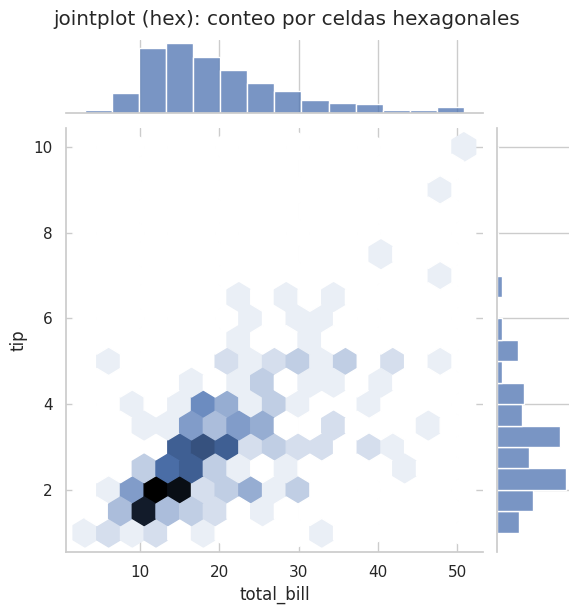

In [219]:
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="hex",
    height=6
)
plt.suptitle("jointplot (hex): conteo por celdas hexagonales", y=1.02)
plt.show()


**kind="hist" (histograma bivariado)**

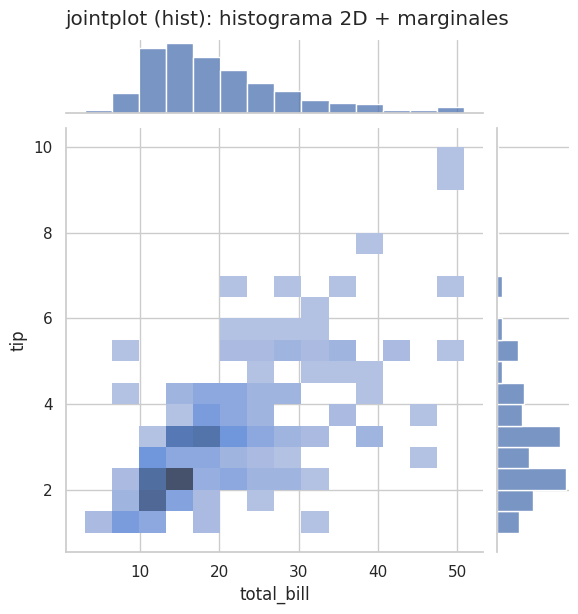

In [220]:
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="hist",
    height=6
)
plt.suptitle("jointplot (hist): histograma 2D + marginales", y=1.02)
plt.show()


**Ejemplo de jointplot con regresión**

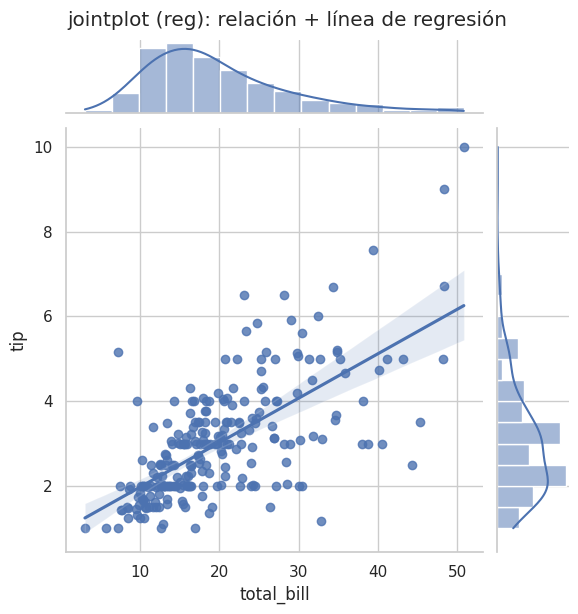

In [221]:
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="reg",
    height=6
)
plt.suptitle("jointplot (reg): relación + línea de regresión", y=1.02)
plt.show()


**Bonus: comparar por grupo con color**

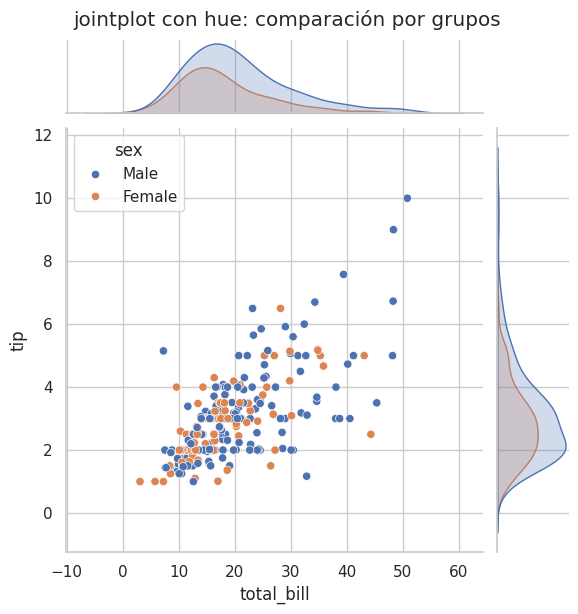

In [222]:
sns.jointplot(
    data=tips,
    x="total_bill",
    y="tip",
    kind="scatter",
    hue="sex", # hue significa “tono de color”
    height=6
)
plt.suptitle("jointplot con hue: comparación por grupos", y=1.02)
plt.show()


## Gráficos de correlación múltiple: pairplot

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
iris = sns.load_dataset("iris")
iris.head()


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

**pairplot básico**

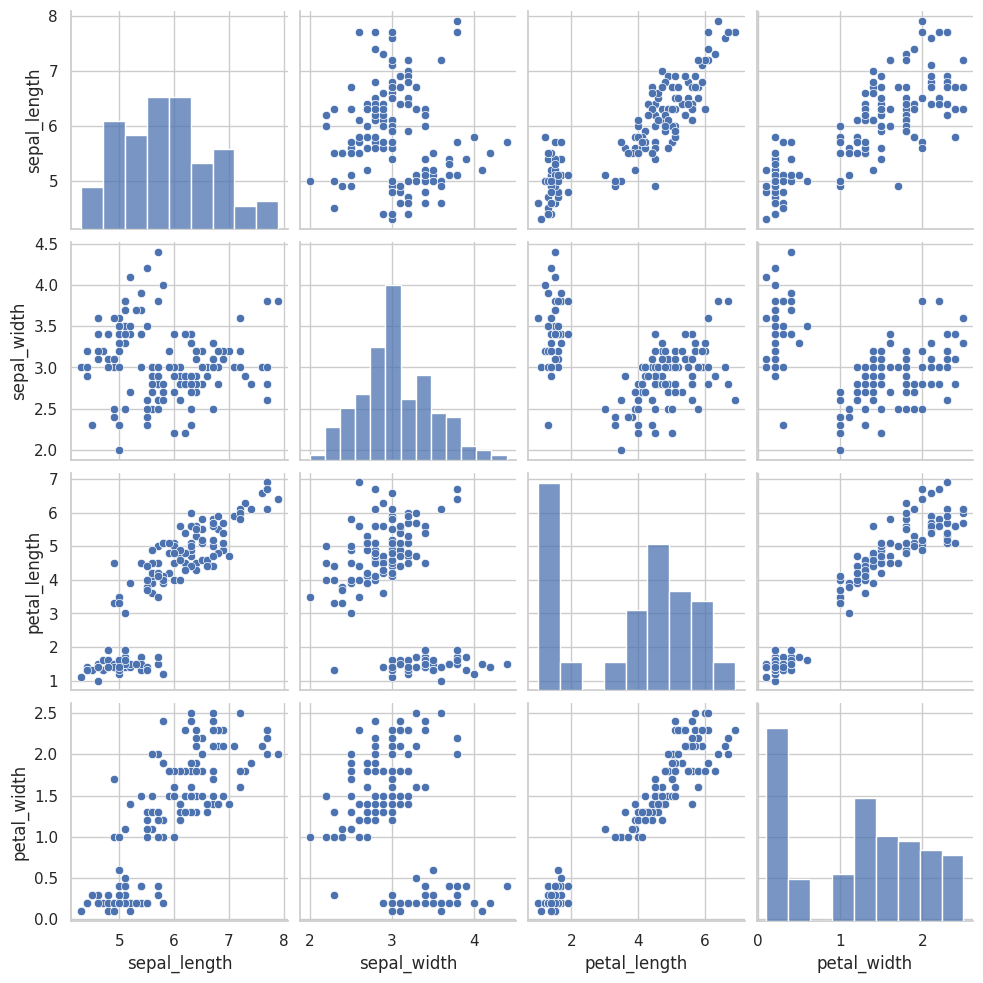

In [224]:
sns.pairplot(iris)
plt.show()


**Parámetros importantes de pairplot**

diag_kind + kind

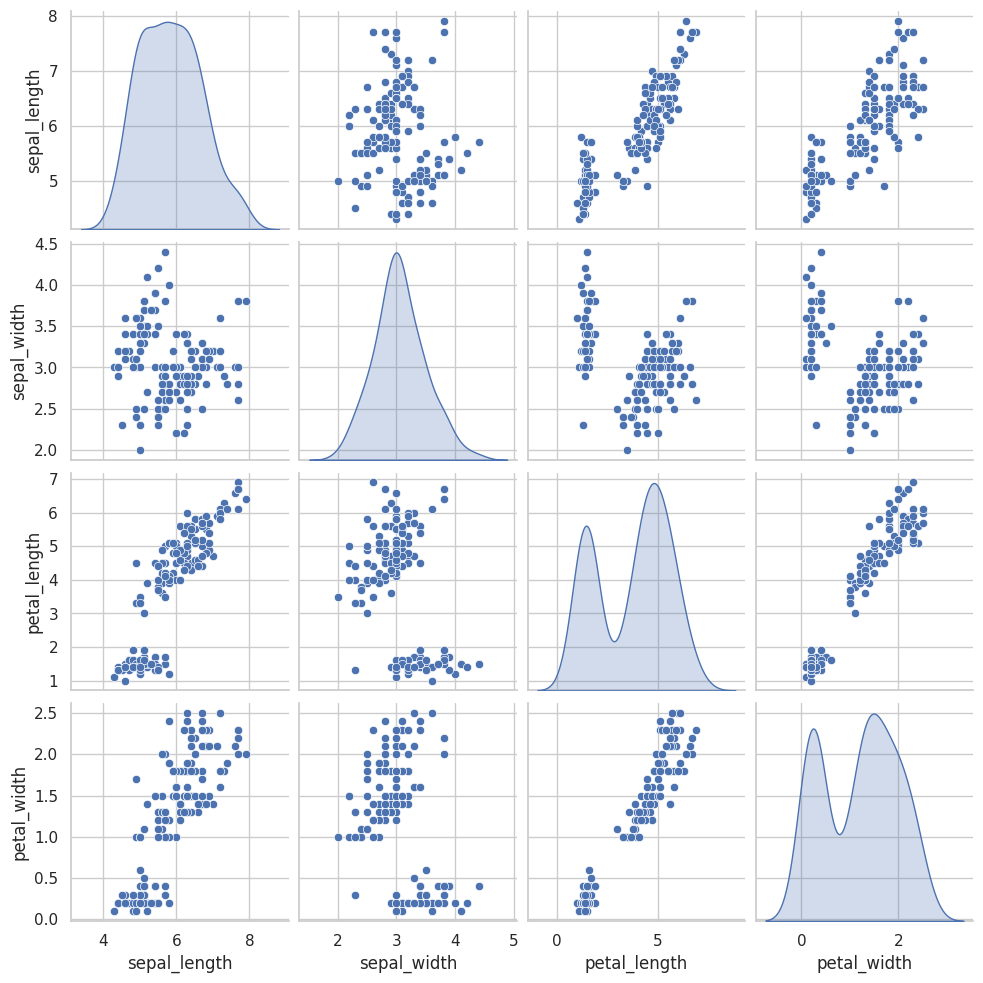

In [225]:
sns.pairplot(
    iris,
    kind="scatter",
    diag_kind="kde"
)
plt.show()


**el demo estrella**

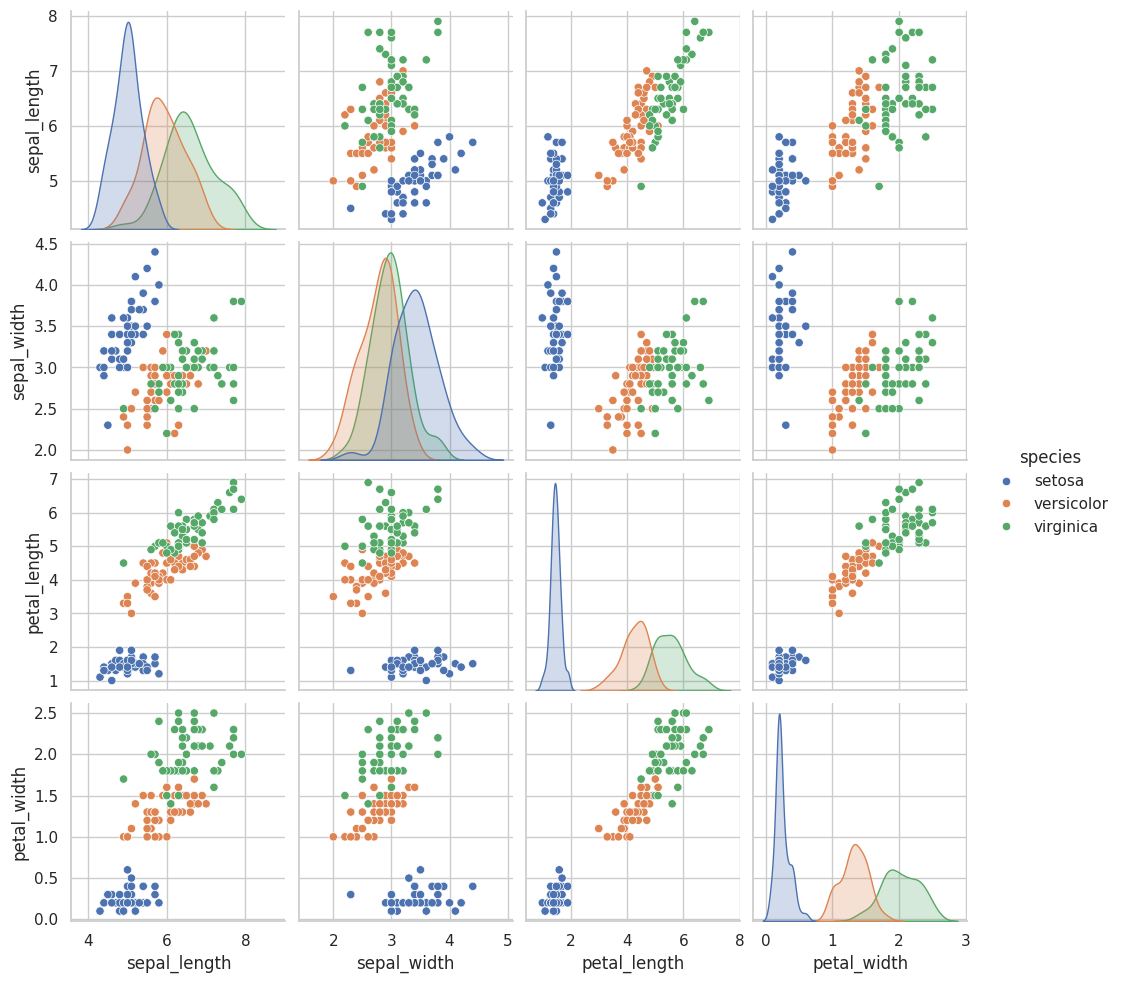

In [226]:
sns.pairplot(
    iris,
    hue="species",
    diag_kind="kde"
)
plt.show()


**Bonus**

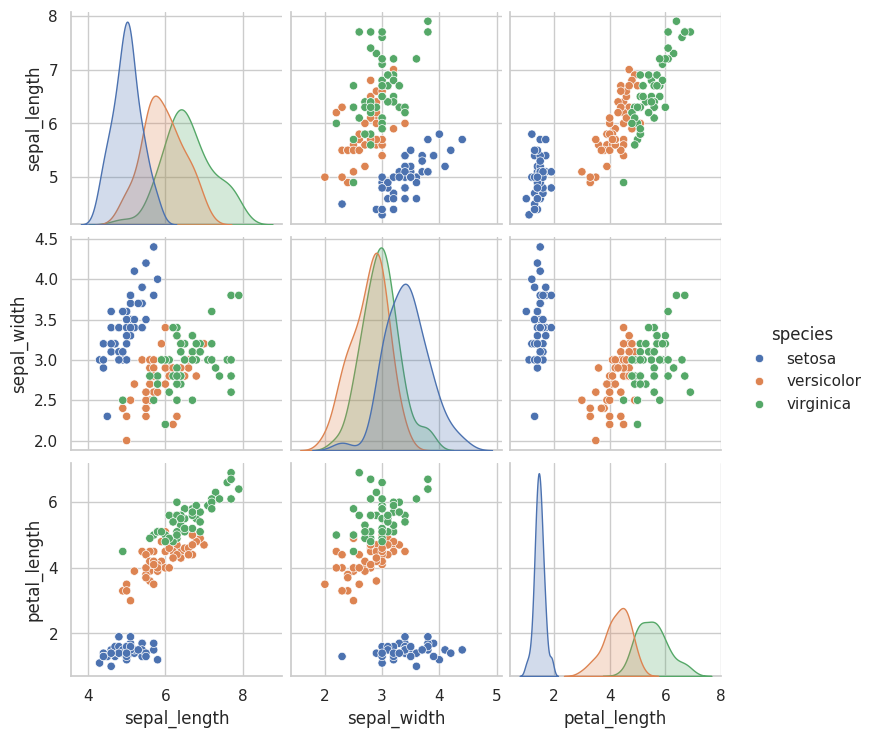

In [227]:
vars_sel = ["sepal_length", "sepal_width", "petal_length"]
sns.pairplot(
    iris,
    vars=vars_sel,
    hue="species",
    diag_kind="kde"
)
plt.show()


## Gráficos de regresiones: regplot

**básico**

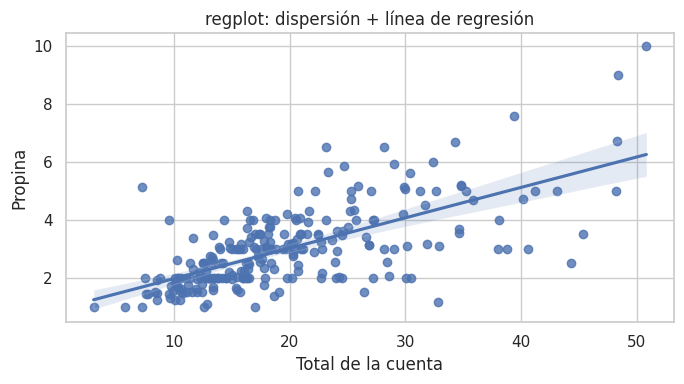

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

plt.figure(figsize=(7,4))
sns.regplot(data=tips, x="total_bill", y="tip")
plt.title("regplot: dispersión + línea de regresión")
plt.xlabel("Total de la cuenta")
plt.ylabel("Propina")
plt.tight_layout()
plt.show()


**Personalización de regplot:**
* ajuste de CI + estilo de puntos/línea

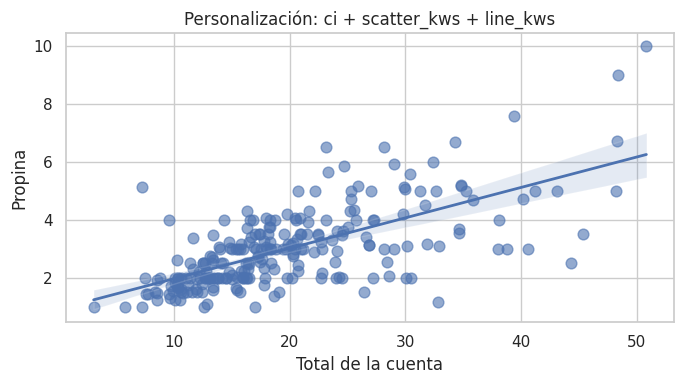

In [229]:
plt.figure(figsize=(7,4))
sns.regplot(
    data=tips, x="total_bill", y="tip",
    ci=95,  # intervalo de confianza
    scatter_kws={"alpha": 0.6, "s": 60},   # transparencia y tamaño de puntos
    line_kws={"lw": 2}                    # grosor de la línea
)
plt.title("Personalización: ci + scatter_kws + line_kws")
plt.xlabel("Total de la cuenta")
plt.ylabel("Propina")
plt.tight_layout()
plt.show()


* Se puede eliminar CI para “limpiar”

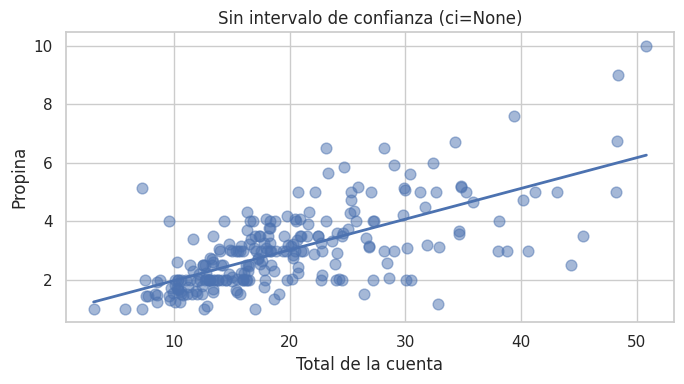

In [230]:
plt.figure(figsize=(7,4))
sns.regplot(
    data=tips, x="total_bill", y="tip",
    ci=None,
    scatter_kws={"alpha": 0.5, "s": 60},
    line_kws={"lw": 2}
)
plt.title("Sin intervalo de confianza (ci=None)")
plt.xlabel("Total de la cuenta")
plt.ylabel("Propina")
plt.tight_layout()
plt.show()


## Gráficos de variables categóricas

**barplot**

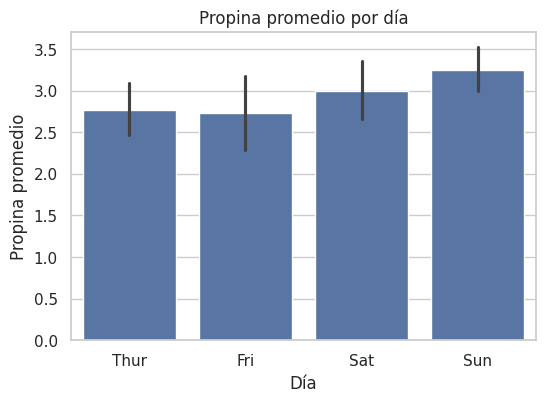

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

plt.figure(figsize=(6,4))
sns.barplot(
    data=tips,
    x="day",
    y="tip",
    estimator="mean" # errorbar=None
)
plt.title("Propina promedio por día")
plt.xlabel("Día")
plt.ylabel("Propina promedio")
plt.show()


Este gráfico no muestra todos los datos, muestra un resumen: el promedio de propina por día.

**countplot**

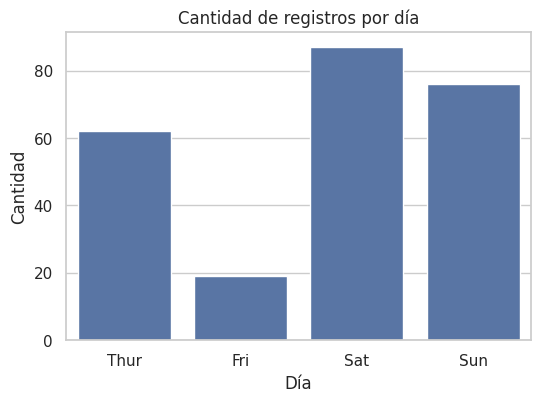

In [232]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=tips,
    x="day"
)
plt.title("Cantidad de registros por día")
plt.xlabel("Día")
plt.ylabel("Cantidad")
plt.show()


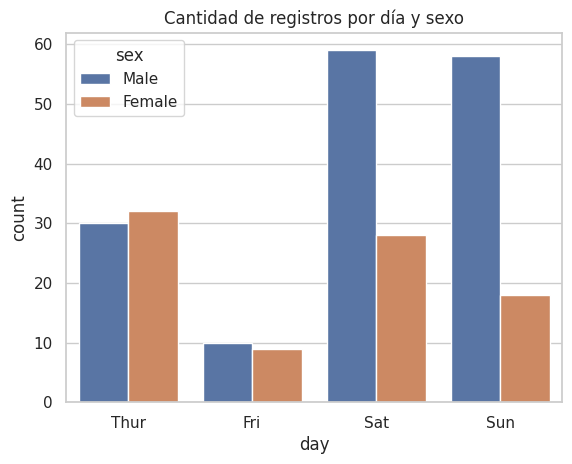

In [233]:
sns.countplot(data=tips, x="day", hue="sex")
plt.title("Cantidad de registros por día y sexo")
plt.show()


**boxplot**

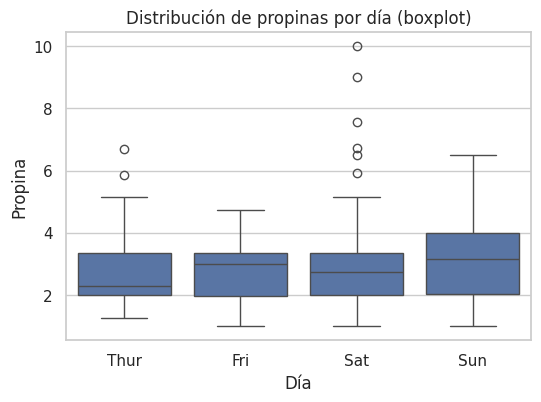

In [234]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=tips,
    x="day",
    y="tip"
)
plt.title("Distribución de propinas por día (boxplot)")
plt.xlabel("Día")
plt.ylabel("Propina")
plt.show()


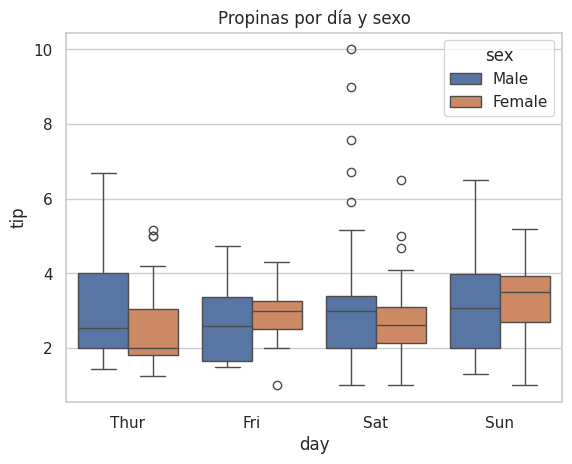

In [235]:
sns.boxplot(data=tips, x="day", y="tip", hue="sex")
plt.title("Propinas por día y sexo")
plt.show()


**violinplot**

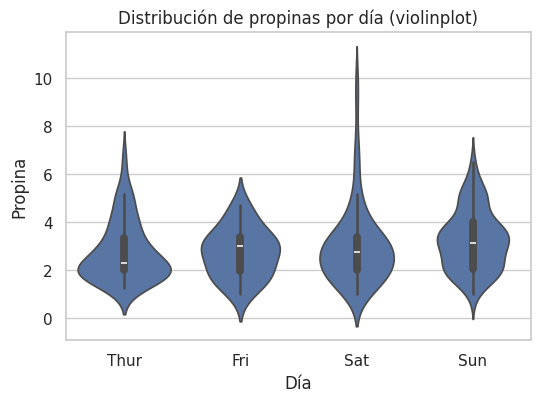

In [236]:
plt.figure(figsize=(6,4))
sns.violinplot(
    data=tips,
    x="day",
    y="tip"
)
plt.title("Distribución de propinas por día (violinplot)")
plt.xlabel("Día")
plt.ylabel("Propina")
plt.show()


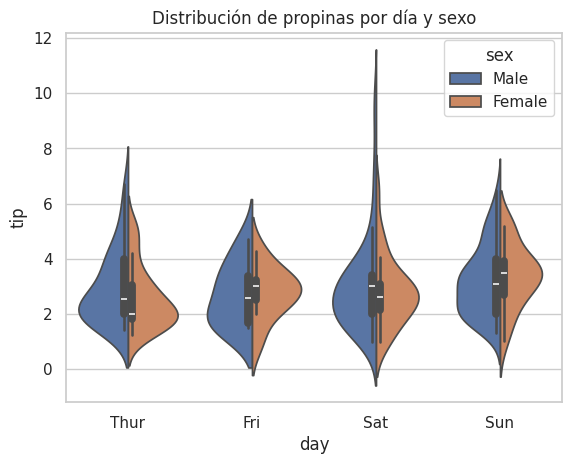

In [237]:
sns.violinplot(
    data=tips,
    x="day",
    y="tip",
    hue="sex",
    split=True
)
plt.title("Distribución de propinas por día y sexo")
plt.show()


* countplot → ¿cuántos hay?
* barplot → ¿cuál es el valor promedio?
* boxplot → ¿cómo se distribuyen los datos?
* violinplot → ¿qué forma tiene esa distribución?

## Gráficos de matrices: heatmap

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="white")

tips = sns.load_dataset("tips")

# Solo variables numéricas
corr = tips.select_dtypes(include="number").corr()
corr


total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

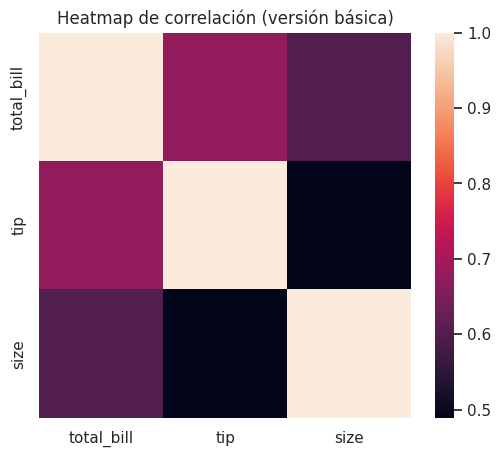

In [2]:
plt.figure(figsize=(6,5))
sns.heatmap(corr)
plt.title("Heatmap de correlación (versión básica)")
plt.show()


**Heatmap con parámetros clave**

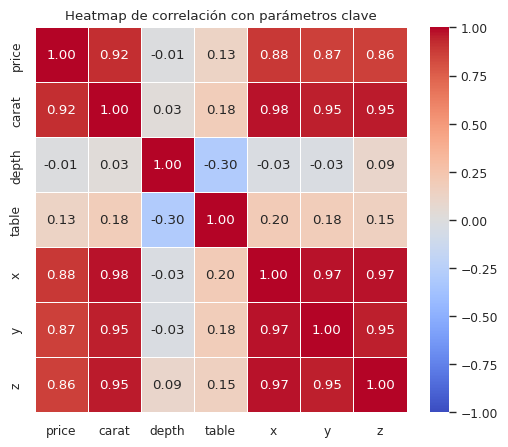

In [290]:
plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,        # mostrar valores
    fmt=".2f",         # formato numérico
    cmap="coolwarm",   # paleta de colores
    linewidths=0.5,    # separación entre celdas
    vmin=-1, vmax=1    # escala fija para correlación
)
plt.title("Heatmap de correlación con parámetros clave")
plt.show()


**Heatmap de datos agregados**

In [286]:
tabla = tips.pivot_table(
    values="tip",
    index="day",
    columns="sex",
    aggfunc="mean"
)

tabla

/tmp/ipython-input-3524788311.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior


sex       Male    Female
day                     
Thur  2.980333  2.575625
Fri   2.693000  2.781111
Sat   3.083898  2.801786
Sun   3.220345  3.367222

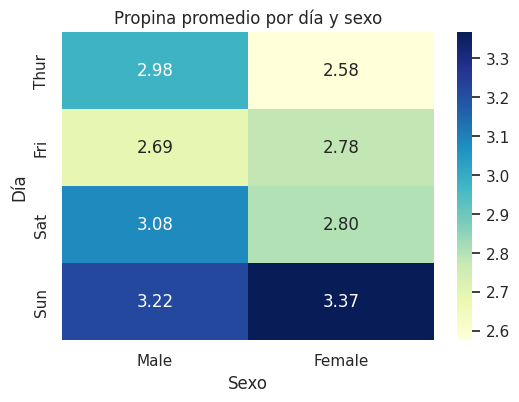

In [242]:
plt.figure(figsize=(6,4))
sns.heatmap(
    tabla,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu"
)
plt.title("Propina promedio por día y sexo")
plt.xlabel("Sexo")
plt.ylabel("Día")
plt.show()


Promedio de propina para un grupo específico.

Resumen:

* Heatmap = matriz + color

* Sirve para correlaciones o tablas agregadas
    * Parámetros clave:
    * annot → leer valores
    * cmap → interpretar magnitudes
    * linewidths → mejorar legibilidad
    * vmin/vmax → controlar escala

## Grillas de gráficos: PairGrid y FacetGrid

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")


**PairGrid:**

Crear una matriz de gráficos para analizar las relaciones entre todas las variables numéricas de un conjunto de datos al mismo tiempo.

- PairGrid con scatter + KDE en diagonal

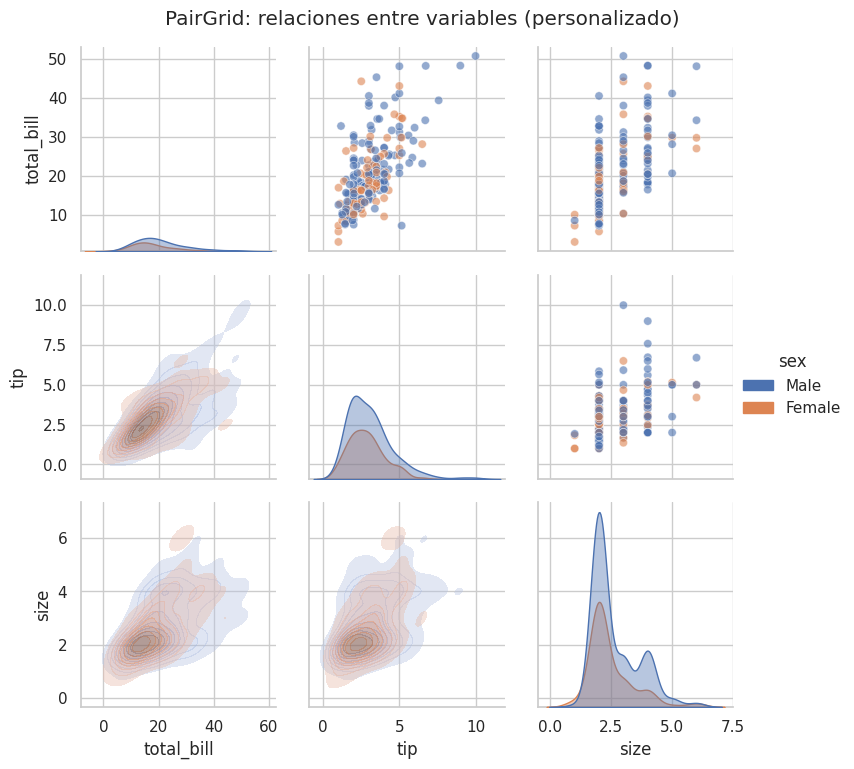

In [244]:
g = sns.PairGrid(
    tips,
    vars=["total_bill", "tip", "size"],  # variables numéricas
    hue="sex"                            # categoría para color
)

g.map_upper(sns.scatterplot, alpha=0.6)
g.map_diag(sns.kdeplot, fill=True, alpha=0.4)
g.map_lower(sns.kdeplot, fill=True, alpha=0.4)

g.add_legend(title="sex")
g.fig.suptitle("PairGrid: relaciones entre variables (personalizado)", y=1.02)
plt.show()


arriba: puntos (relación)

diagonal: distribución (KDE)

abajo: densidad 2D (KDE)

y además color por categoría

* El sns.kdeplot es un gráfico de Estimación de Densidad de Kernel (Kernel Density Estimate). En palabras sencillas, es una versión suavizada del histograma.

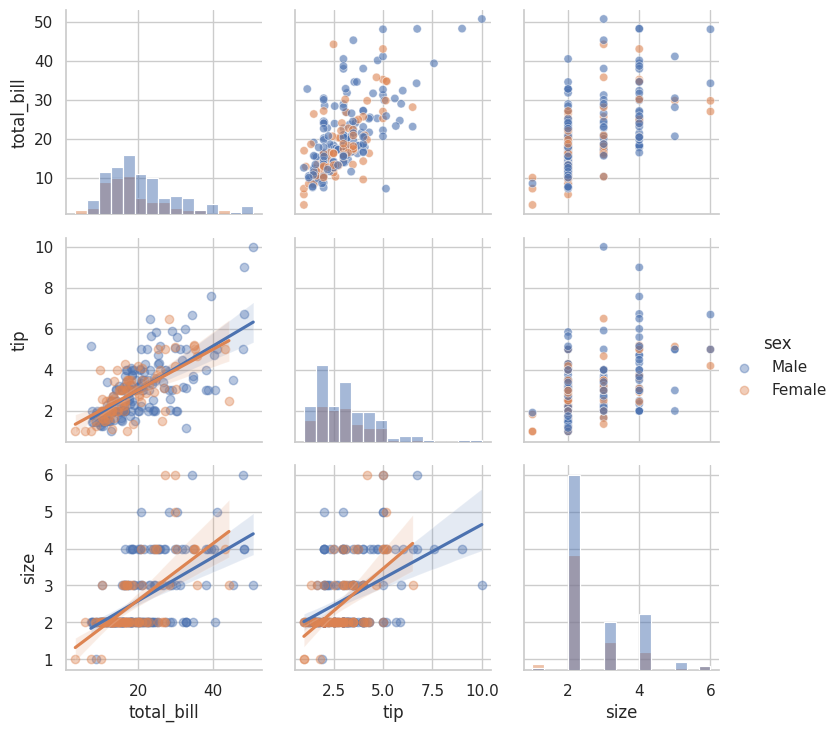

In [245]:
g = sns.PairGrid(tips, vars=["total_bill", "tip", "size"], hue="sex")
g.map_upper(sns.scatterplot, alpha=0.6)
g.map_diag(sns.histplot, bins=15)
g.map_lower(sns.regplot, scatter_kws={"alpha":0.4})
g.add_legend()
plt.show()


**FacetGrid**

El sns.FacetGrid es una de las funciones más potentes de Seaborn porque te permite segmentar tus datos en múltiples sub-gráficos basándose en categorías.


Si el PairGrid comparaba diferentes columnas entre sí, el FacetGrid toma una misma relación (por ejemplo, Cuenta vs. Propina) y la repite en varios cuadros para diferentes grupos (por ejemplo, un cuadro para Almuerzo y otro para Cena).

* FacetGrid de histogramas por día

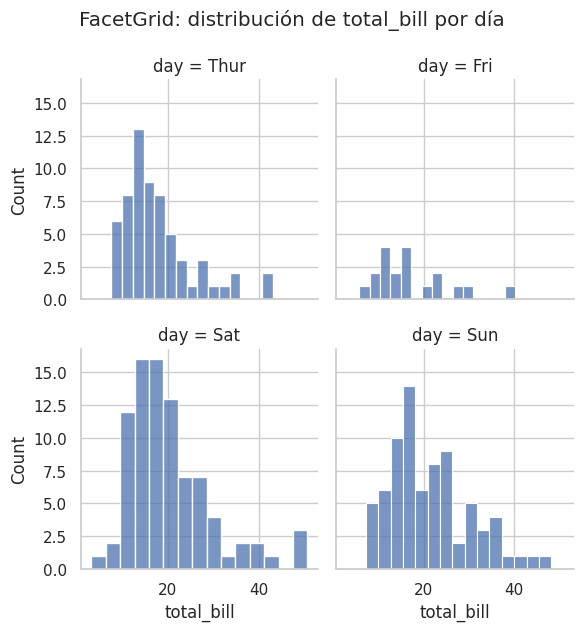

In [246]:
g = sns.FacetGrid(tips, col="day", col_wrap=2, height=3, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="total_bill", bins=15)
g.fig.suptitle("FacetGrid: distribución de total_bill por día", y=1.05)
plt.show()


* FacetGrid de dispersión por fumador y sexo

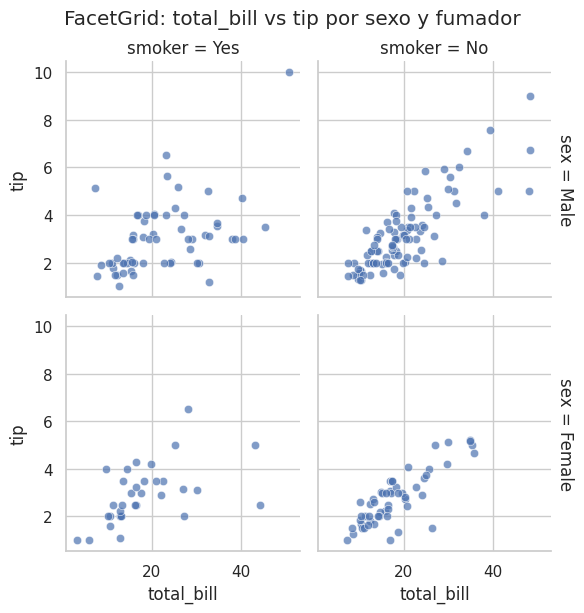

In [247]:
g = sns.FacetGrid(tips, col="smoker", row="sex", height=3, margin_titles=True)
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip", alpha=0.7)

g.fig.suptitle("FacetGrid: total_bill vs tip por sexo y fumador", y=1.02)
plt.show()


## Ejercicio: Personalización progresiva de un gráfico en Seaborn

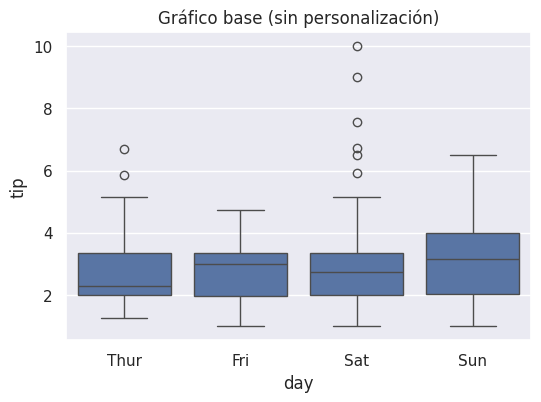

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()  # estilo por defecto
tips = sns.load_dataset("tips")

plt.figure(figsize=(6,4))
sns.boxplot(data=tips, x="day", y="tip")
plt.title("Gráfico base (sin personalización)")
plt.show()


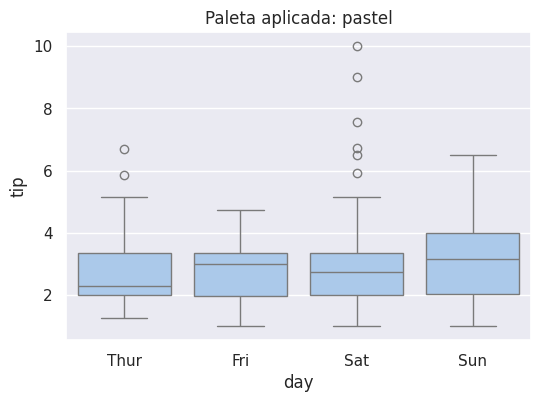

In [249]:
palette = "pastel"   # probar: deep, muted, pastel, bright, dark, colorblind

sns.set_palette(palette)

plt.figure(figsize=(6,4))
sns.boxplot(data=tips, x="day", y="tip")
plt.title(f"Paleta aplicada: {palette}")
plt.show()


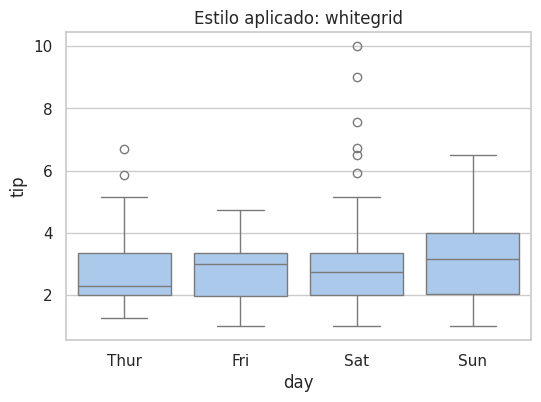

In [250]:
style = "whitegrid"  # probar: white, whitegrid, dark, darkgrid, ticks

sns.set_style(style)

plt.figure(figsize=(6,4))
sns.boxplot(data=tips, x="day", y="tip")
plt.title(f"Estilo aplicado: {style}")
plt.show()


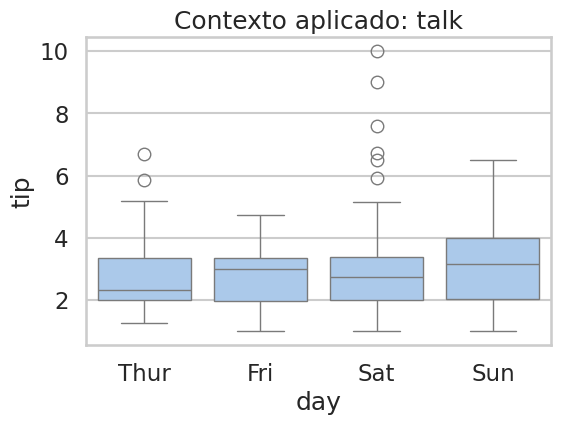

In [251]:
context = "talk"  # probar: paper, notebook, talk, poster

sns.set_context(context)

plt.figure(figsize=(6,4))
sns.boxplot(data=tips, x="day", y="tip")
plt.title(f"Contexto aplicado: {context}")
plt.show()


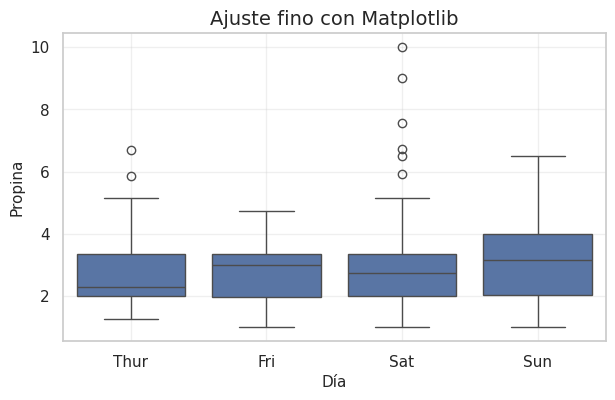

In [252]:
sns.set_theme(style="whitegrid", context="notebook")

fig, ax = plt.subplots(figsize=(7,4))

sns.boxplot(data=tips, x="day", y="tip", ax=ax)

ax.set_title("Ajuste fino con Matplotlib", fontsize=14)
ax.set_xlabel("Día", fontsize=11)
ax.set_ylabel("Propina", fontsize=11)
ax.grid(alpha=0.3)

plt.show()


## Ejercicio 1

**Paso 1 — Importar dataset y librerías**

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

tips.head()


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

**Paso 2 — Análisis univariado: distribución de la propina**

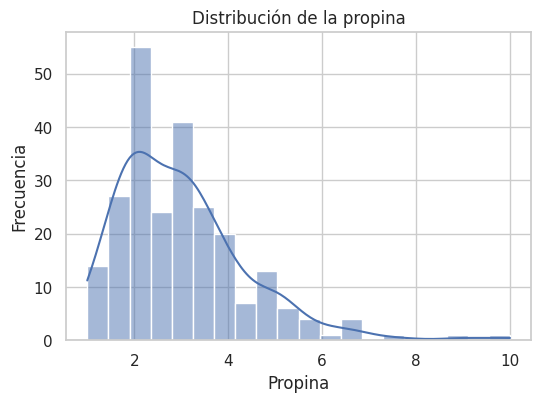

In [254]:
plt.figure(figsize=(6,4))
sns.histplot(tips["tip"], bins=20, kde=True)
plt.title("Distribución de la propina")
plt.xlabel("Propina")
plt.ylabel("Frecuencia")
plt.show()


**Paso 3 — Relación entre total de la cuenta y propina**

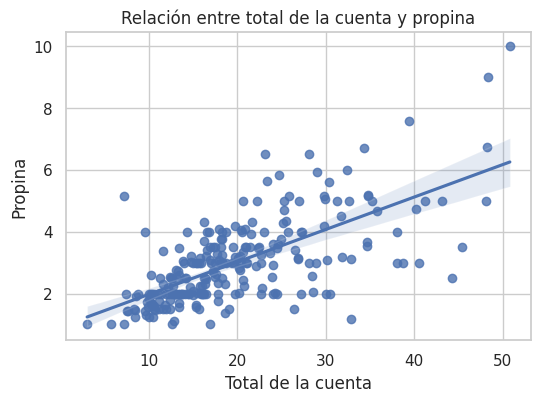

In [255]:
plt.figure(figsize=(6,4))
sns.regplot(data=tips, x="total_bill", y="tip")
plt.title("Relación entre total de la cuenta y propina")
plt.xlabel("Total de la cuenta")
plt.ylabel("Propina")
plt.show()


**Paso 4 — Agregar categoría con hue**

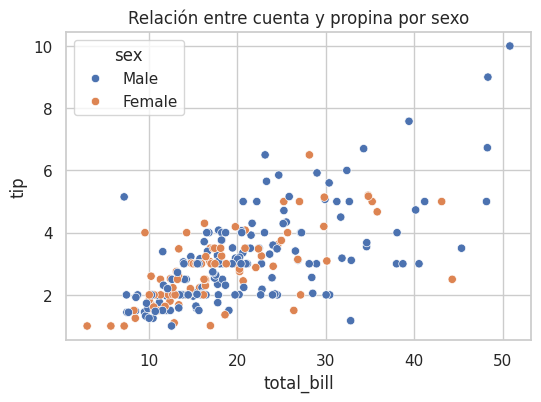

In [256]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="sex"
)
plt.title("Relación entre cuenta y propina por sexo")
plt.show()


**Paso 5 — Comparación categórica: día de la semana**

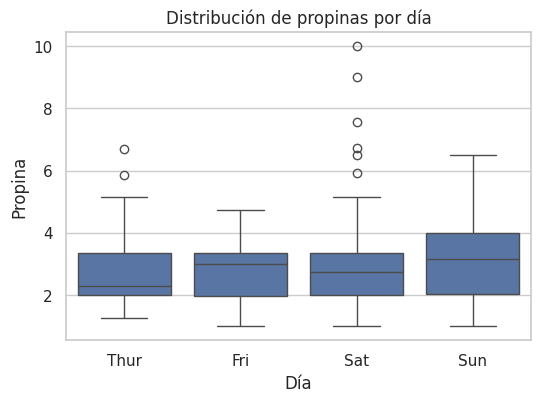

In [257]:
plt.figure(figsize=(6,4))
sns.boxplot(data=tips, x="day", y="tip")
plt.title("Distribución de propinas por día")
plt.xlabel("Día")
plt.ylabel("Propina")
plt.show()


**Resumen global: matriz de correlación**

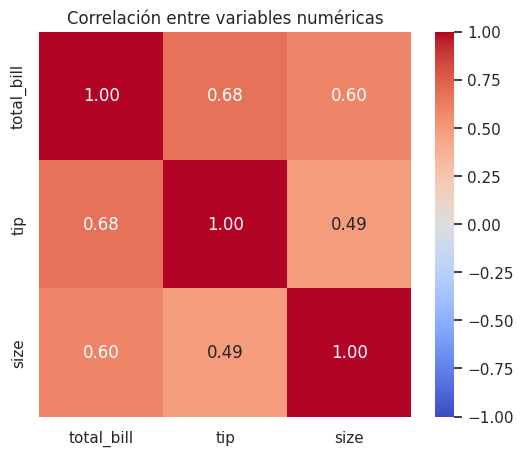

In [258]:
corr = tips.select_dtypes(include="number").corr()

plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1
)
plt.title("Correlación entre variables numéricas")
plt.show()


# **PARTE 2**

## Alternativas a Seaborn

In [259]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

1. Plotly (interactivo)

In [260]:
import plotly.express as px

fig = px.scatter(
    tips,
    x="total_bill",
    y="tip",
    color="smoker",
    trendline="ols",
    title="Plotly: total_bill vs tip (con trendline)"
)
fig.show()


2. Bokeh (interactivo orientado a web)

In [261]:
from bokeh.io import output_notebook
output_notebook()


In [262]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10

source = ColumnDataSource(tips)

p = figure(
    width=700, height=400,
    title="Bokeh: total_bill vs tip",
    x_axis_label="total_bill", y_axis_label="tip",
    tools="pan,wheel_zoom,box_zoom,reset,save,hover",
    tooltips=[("total_bill", "@total_bill"), ("tip", "@tip"), ("smoker", "@smoker")]
)

p.scatter(
    x="total_bill", y="tip",
    source=source,
    marker="circle",
    size=7, alpha=0.6,
    color=factor_cmap("smoker", palette=Category10[3], factors=["Yes", "No"])
)

show(p)

3. Altair

In [263]:
import altair as alt

alt.Chart(tips).mark_circle(size=60, opacity=0.6).encode(
    x="total_bill:Q",
    y="tip:Q",
    color="smoker:N",
    tooltip=["total_bill", "tip", "smoker", "day", "sex"]
).properties(
    width=650,
    height=400,
    title="Altair: total_bill vs tip (declarativo)"
).interactive()


alt.Chart(...)

4. Matplotlib

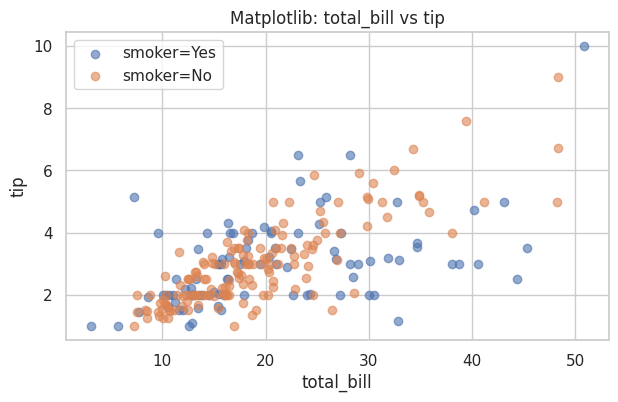

In [264]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,4))

for smoker, grp in tips.groupby("smoker", observed=True):
    ax.scatter(grp["total_bill"], grp["tip"], alpha=0.6, label=f"smoker={smoker}")

ax.set_title("Matplotlib: total_bill vs tip")
ax.set_xlabel("total_bill")
ax.set_ylabel("tip")
ax.legend()
plt.show()

5. Plotnine

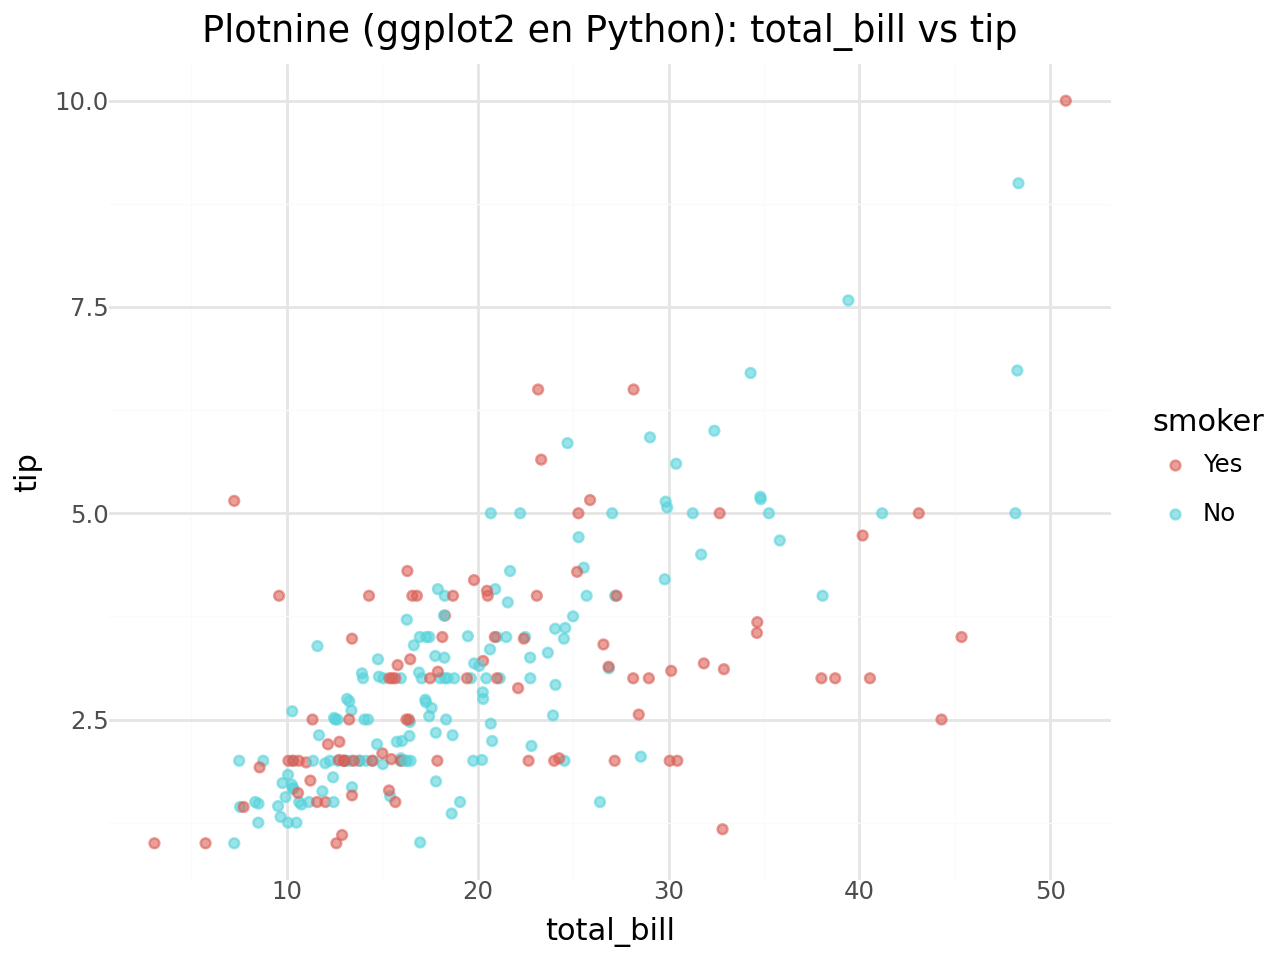

In [265]:
from plotnine import ggplot, aes, geom_point, labs, theme_minimal

(
    ggplot(tips, aes(x="total_bill", y="tip", color="smoker"))
    + geom_point(alpha=0.6)
    + theme_minimal()
    + labs(
        title="Plotnine (ggplot2 en Python): total_bill vs tip",
        x="total_bill",
        y="tip"
    )
)


## Personalización de paletas de colores

1.Paleta por defecto vs pastel vs colorblind

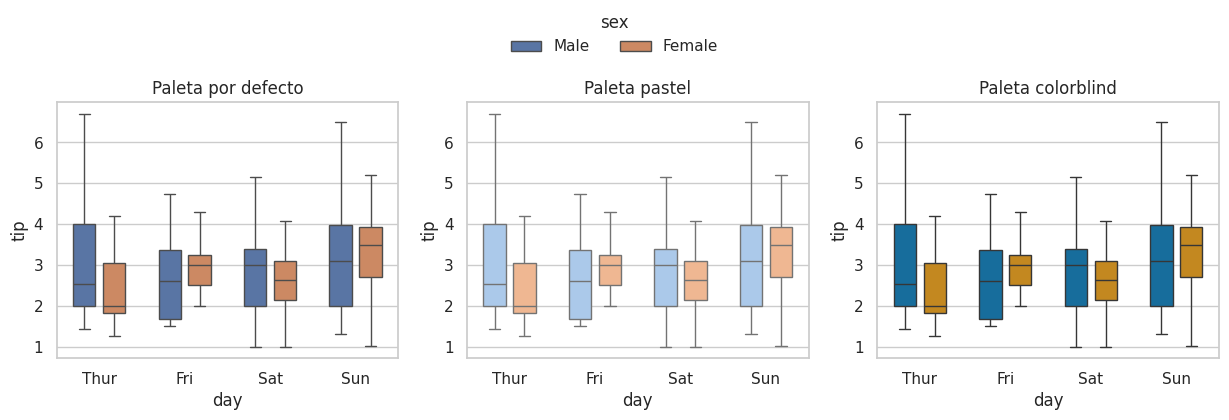

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))


# Default
sns.set_palette("deep")
#sns.boxplot(data=tips, x="day", y="tip", hue="sex", ax=axes[0])
sns.boxplot(
    data=tips, x="day", y="tip", hue="sex",
    width=0.7,
    gap=0.25,       # separa Male/Female dentro de cada día
    showfliers=False,
    linewidth=1,
    ax=axes[0]
)
axes[0].set_title("Paleta por defecto")
axes[0].legend_.remove()

# Pastel
sns.set_palette("pastel")
#sns.boxplot(data=tips, x="day", y="tip", hue="sex", ax=axes[1])
sns.boxplot(
    data=tips, x="day", y="tip", hue="sex",
    width=0.7,
    gap=0.25,       # separa Male/Female dentro de cada día
    showfliers=False,
    linewidth=1,
    ax=axes[1]
)
axes[1].set_title("Paleta pastel")
axes[1].legend_.remove()

# Colorblind
sns.set_palette("colorblind")
#sns.boxplot(data=tips, x="day", y="tip", hue="sex", ax=axes[2])
sns.boxplot(
    data=tips, x="day", y="tip", hue="sex",
    width=0.7,
    gap=0.25,       # separa Male/Female dentro de cada día
    showfliers=False,
    linewidth=1,
    ax=axes[2]
)
axes[2].set_title("Paleta colorblind")
axes[2].legend_.remove()

# Agregar leyenda
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="sex", loc="upper center", ncol=2, frameon=False)

plt.subplots_adjust(top=0.75)
plt.show()



2. Paleta personalizada

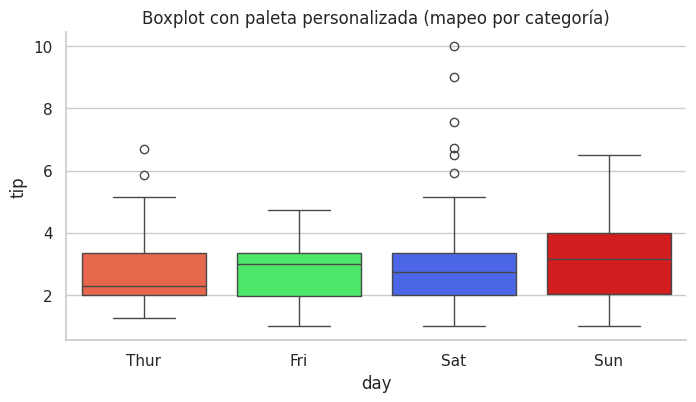

In [267]:
pal_day = {
    "Thur": "#FF5733",
    "Fri":  "#33FF57",
    "Sat":  "#3357FF",
    "Sun":  "#F00000"
}

plt.figure(figsize=(8,4))
ax = sns.boxplot(
    data=tips,
    x="day", y="tip",
    hue="day",
    palette=pal_day,
    legend=False
)
plt.title("Boxplot con paleta personalizada (mapeo por categoría)")
sns.despine()
plt.show()


3. Heatmap con viridis vs rocket

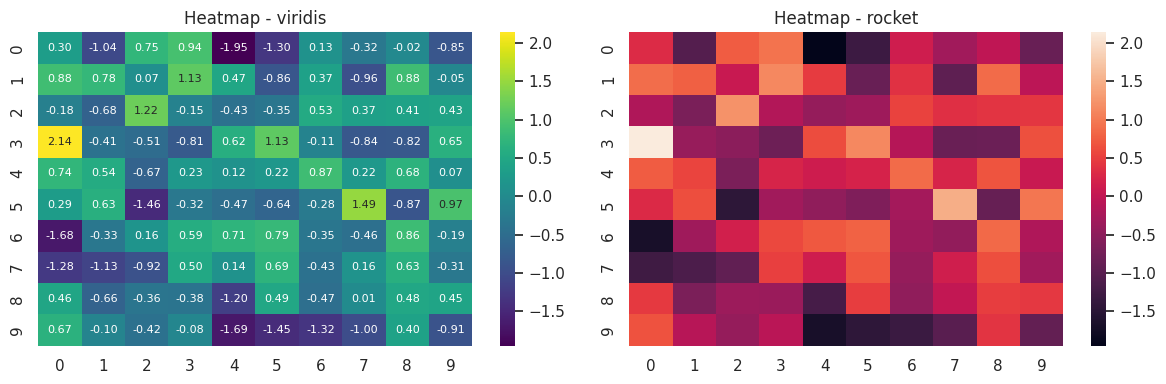

In [268]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de ejemplo (matriz 10x10)
rng = np.random.default_rng(42)
M = rng.normal(size=(10, 10))


cmap_viridis = sns.color_palette("viridis", as_cmap=True)
cmap_rocket  = sns.color_palette("rocket",  as_cmap=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(M, cmap=cmap_viridis,
            annot=True, fmt=".2f", annot_kws={"size": 8},  # <-- números en cada celda
            ax=axes[0])
axes[0].set_title("Heatmap - viridis")

sns.heatmap(M, cmap=cmap_rocket, ax=axes[1])
axes[1].set_title("Heatmap - rocket")

plt.tight_layout()
plt.show()

* Scatter con color continuo (propina) usando tips

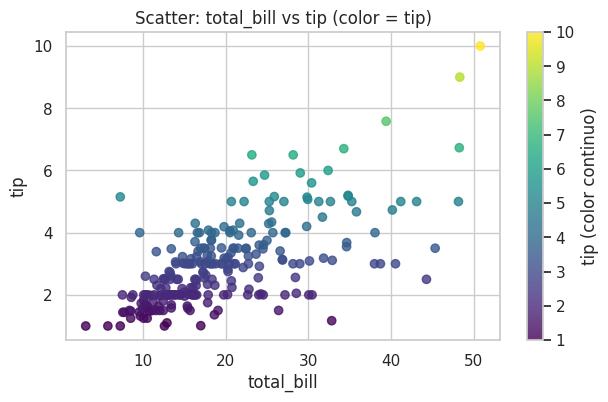

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

cmap_viridis = sns.color_palette("viridis", as_cmap=True)

plt.figure(figsize=(7,4))
plt.scatter(
    tips["total_bill"], tips["tip"],
    c=tips["tip"], cmap=cmap_viridis, alpha=0.8
)
plt.colorbar(label="tip (color continuo)")
plt.title("Scatter: total_bill vs tip (color = tip)")
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.show()


## Exportación y publicación

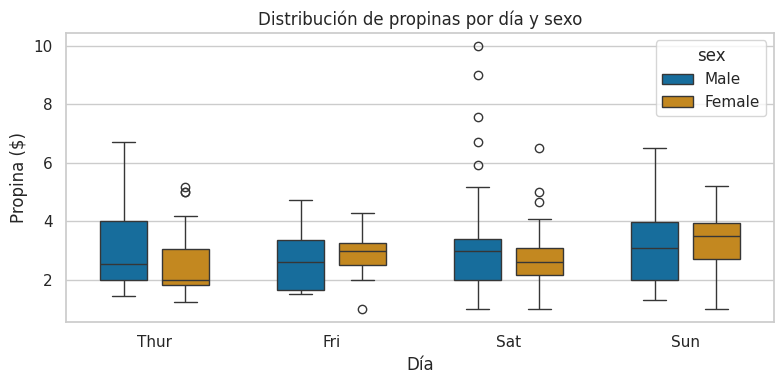

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

fig, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(data=tips, x="day", y="tip", hue="sex", width=0.7,
    gap=0.25,  palette="colorblind")
ax.set_title("Distribución de propinas por día y sexo")
ax.set_xlabel("Día")
ax.set_ylabel("Propina ($)")

fig.tight_layout()

# Guardar ANTES (o incluso después) de mostrar, pero usando fig
fig.savefig("propinas_web.png", dpi=150, bbox_inches="tight")
fig.savefig("propinas_paper.pdf", bbox_inches="tight")   # ideal para “papel”
fig.savefig("propinas_paper.svg", bbox_inches="tight")   # vectorial también

plt.show()



# **Live Coding**


1. Cargar un dataset ejemplo con múltiples variables.



In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = sns.load_dataset("penguins")
df = df.dropna()  # para evitar NaN

In [272]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male

El dataset penguins contiene mediciones morfológicas de pingüinos reales, recolectadas en la Antártica, y se usa mucho en visualización y estadística como alternativa más moderna al clásico iris.

Cada fila representa un pingüino individual.

| Variable            | Tipo          | Descripción                                                     | Uso típico en visualización                |
| ------------------- | ------------- | --------------------------------------------------------------- | ------------------------------------------ |
| `species`           | Categórica    | Especie del pingüino (Adelie, Chinstrap, Gentoo)                | FacetGrid, `hue`, comparación entre grupos |
| `island`            | Categórica    | Isla donde fue observado el pingüino (Torgersen, Biscoe, Dream) | Segmentación por contexto geográfico       |
| `sex`               | Categórica    | Sexo del pingüino (Male / Female)                               | `hue`, boxplots comparativos               |
| `bill_length_mm`    | Numérica (mm) | Largo del pico en milímetros                                    | Scatterplot, correlación                   |
| `bill_depth_mm`     | Numérica (mm) | Profundidad del pico en milímetros                              | Scatterplot, correlación                   |
| `flipper_length_mm` | Numérica (mm) | Largo de la aleta en milímetros                                 | Relación con peso y especie                |
| `body_mass_g`       | Numérica (g)  | Masa corporal en gramos                                         | Distribuciones, correlaciones              |


2. Generar gráficos con hue para comparar distribuciones entre subgrupos.

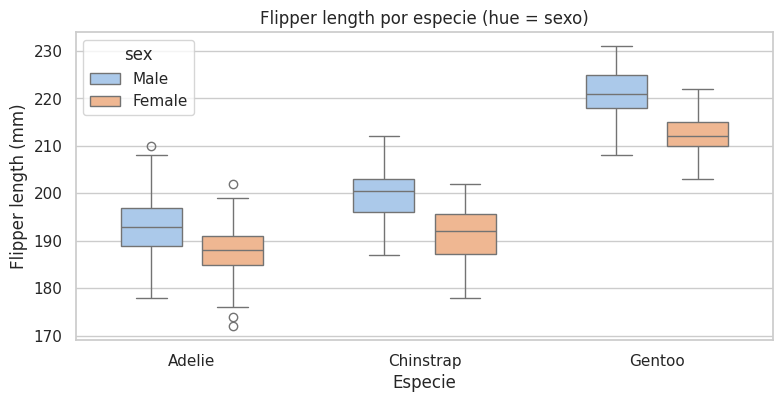

In [273]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.boxplot(
    data=df,
    x="species", y="flipper_length_mm",
    hue="sex",
    palette="pastel", width=0.7, gap=0.25,
    ax=ax
)
ax.set_title("Flipper length por especie (hue = sexo)")
ax.set_xlabel("Especie")
ax.set_ylabel("Flipper length (mm)")
plt.show()

3. Crear un FacetGrid para visualizar múltiples gráficos segmentados por categoría.

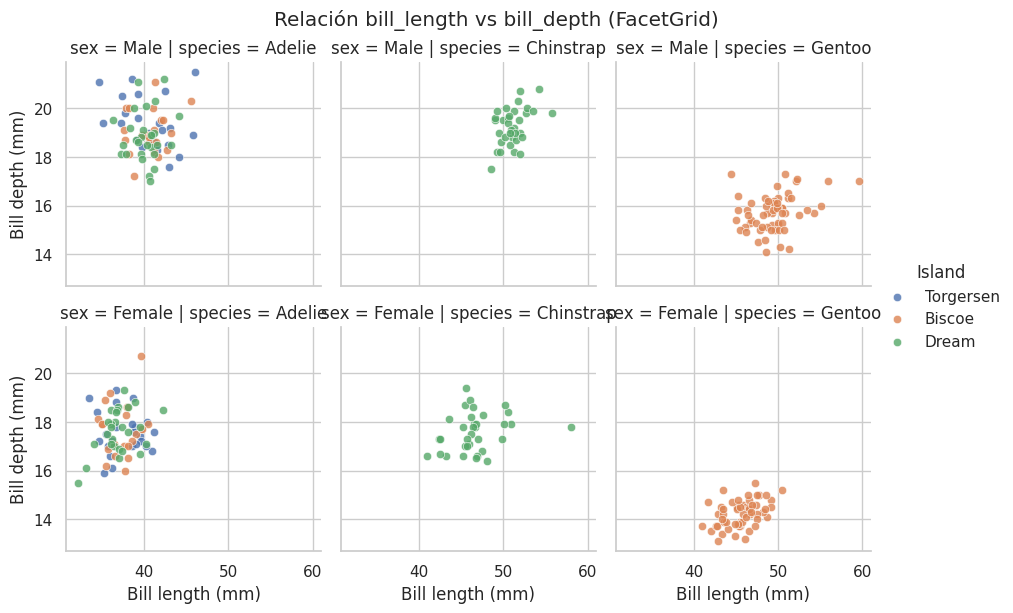

In [274]:
g = sns.FacetGrid(
    df,
    row="sex", col="species",
    hue="island",
    height=3, aspect=1,
    palette="deep"
)
g.map_dataframe(sns.scatterplot, x="bill_length_mm", y="bill_depth_mm", alpha=0.8)
g.add_legend(title="Island")
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)")
g.fig.suptitle("Relación bill_length vs bill_depth (FacetGrid)", y=1.02)

plt.show()

FacetGrid(col="species") → ver si la relación cambia entre especies

4. Aplicar un heatmap para visualizar la matriz de correlación de variables

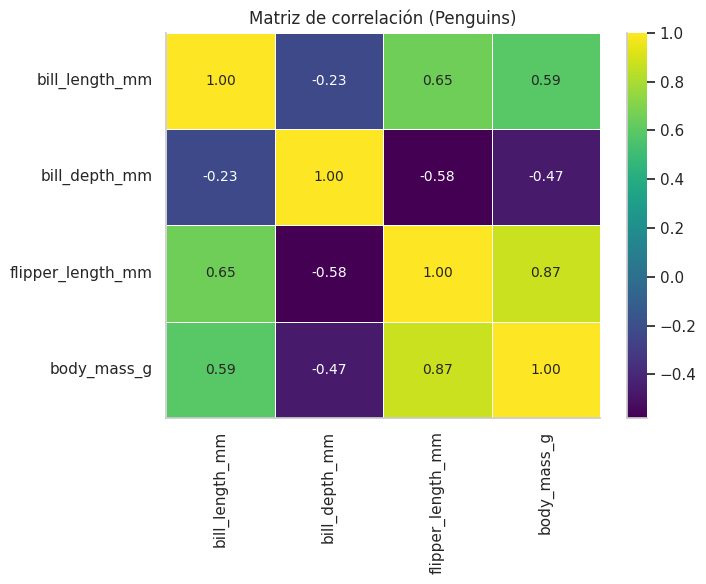

In [275]:
num_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
corr = df[num_cols].corr()

fig, ax = plt.subplots(figsize=(7, 5))

sns.heatmap(
    corr,
    annot=True, fmt=".2f",            # números en cada celda
    annot_kws={"size": 10},           # tamaño de esos números (puedes subir/bajar)
    cmap=sns.color_palette("viridis", as_cmap=True),  # paleta continua
    linewidths=0.5,
    ax=ax
)

ax.set_title("Matriz de correlación (Penguins)")
sns.despine()

fig.savefig("penguins_corr_heatmap_web.png", dpi=150, bbox_inches="tight")
plt.show()

heatmap → resumir cómo se relacionan las medidas físicas

* Esto nos confirma que flipper_length y body_mass están fuertemente relacionados, mientras que bill_depth aporta información distinta

5. Ajustar estilo visual con sns.set_theme() y sns.set_context().


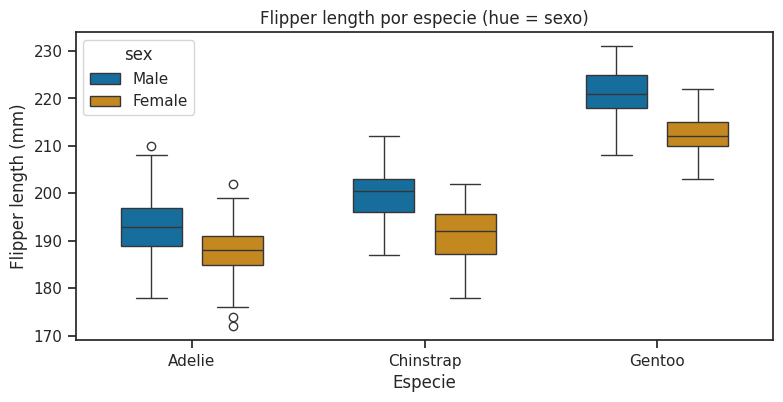

In [276]:
sns.set_theme(style="ticks")                 # "white", "darkgrid", "ticks"
sns.set_context("notebook", font_scale=1.0)  # "paper", "talk", "poster"
fig, ax = plt.subplots(figsize=(9, 4))
sns.boxplot(
    data=df,
    x="species", y="flipper_length_mm",
    hue="sex",
    palette="colorblind", width=0.7, gap=0.25,
    ax=ax
)
ax.set_title("Flipper length por especie (hue = sexo)")
ax.set_xlabel("Especie")
ax.set_ylabel("Flipper length (mm)")
plt.show()

6. Personalizar colores con palette y limpiar bordes con despine.

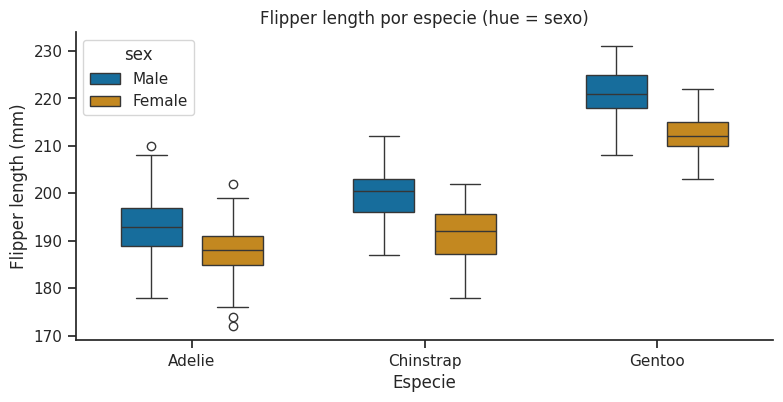

In [277]:
fig, ax = plt.subplots(figsize=(9, 4))
sns.boxplot(
    data=df,
    x="species", y="flipper_length_mm",
    hue="sex",
    palette="colorblind", width=0.7, gap=0.25,
    ax=ax
)
ax.set_title("Flipper length por especie (hue = sexo)")
ax.set_xlabel("Especie")
ax.set_ylabel("Flipper length (mm)")
sns.despine()
plt.show()

7. Guardar el gráfico como imagen con plt.savefig().

In [278]:
fig.savefig("penguins_boxplot_web.png", dpi=150, bbox_inches="tight")

8. Analizar visualmente los patrones detectados en los gráficos.

In [279]:
print("Pistas de interpretación:")
print("- Boxplot: compara medianas y dispersión por especie/sexo; ojo con outliers.")
print("- FacetGrid: mira si la relación entre variables cambia según especie/sexo/isla.")
print("- Heatmap: valores cercanos a 1/-1 indican relación lineal fuerte; cerca de 0, débil.")

Pistas de interpretación:
- Boxplot: compara medianas y dispersión por especie/sexo; ojo con outliers.
- FacetGrid: mira si la relación entre variables cambia según especie/sexo/isla.
- Heatmap: valores cercanos a 1/-1 indican relación lineal fuerte; cerca de 0, débil.


## **EJERCICIO 2**

1. Carge un dataset multivariado desde seaborn.load_dataset().

El dataset diamonds contiene información sobre diamantes reales, usados habitualmente en estudios de precios, calidad y visualización multivariada.
Cada fila representa un diamante individual, con sus características físicas, de calidad y su precio final en dólares.

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("diamonds")
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

| Columna   | Tipo                 | Qué representa                           | Comentario para entenderla bien                                     |
| --------- | -------------------- | ---------------------------------------- | ------------------------------------------------------------------- |
| `price`   | Numérica             | Precio del diamante (USD)                | Variable objetivo. Resume el efecto combinado de todas las demás.   |
| `carat`   | Numérica             | Peso del diamante (quilates)             | A mayor carat, mayor precio… pero no de forma estrictamente lineal. |
| `cut`     | Categórica (ordinal) | Calidad del corte                        | Mejor corte → mejor brillo. No siempre domina sobre carat.          |
| `color`   | Categórica (ordinal) | Color del diamante (D = mejor, J = peor) | Menos color (más transparente) suele ser más valioso.               |
| `clarity` | Categórica (ordinal) | Claridad interna (imperfecciones)        | IF es la mejor, I la más baja. Impacto sutil pero relevante.        |
| `depth`   | Numérica             | Profundidad total (%)                    | Relaciona altura con diámetro. Valores extremos bajan calidad.      |
| `table`   | Numérica             | Tamaño de la mesa superior (%)           | Afecta cómo entra y se refleja la luz.                              |
| `x`       | Numérica             | Largo del diamante (mm)                  | Parte de las dimensiones físicas reales.                            |
| `y`       | Numérica             | Ancho del diamante (mm)                  | Muy correlacionada con `x` y `carat`.                               |
| `z`       | Numérica             | Altura del diamante (mm)                 | Profundidad física real (no confundir con `depth`).                 |


2. Identifique al menos dos variables categóricas y dos numéricas.

* Categóricas: cut, color

* Numéricas: price, carat

3. Genere un gráfico con sns.boxplot() o sns.barplot() usando hue o col para segmentar los datos.

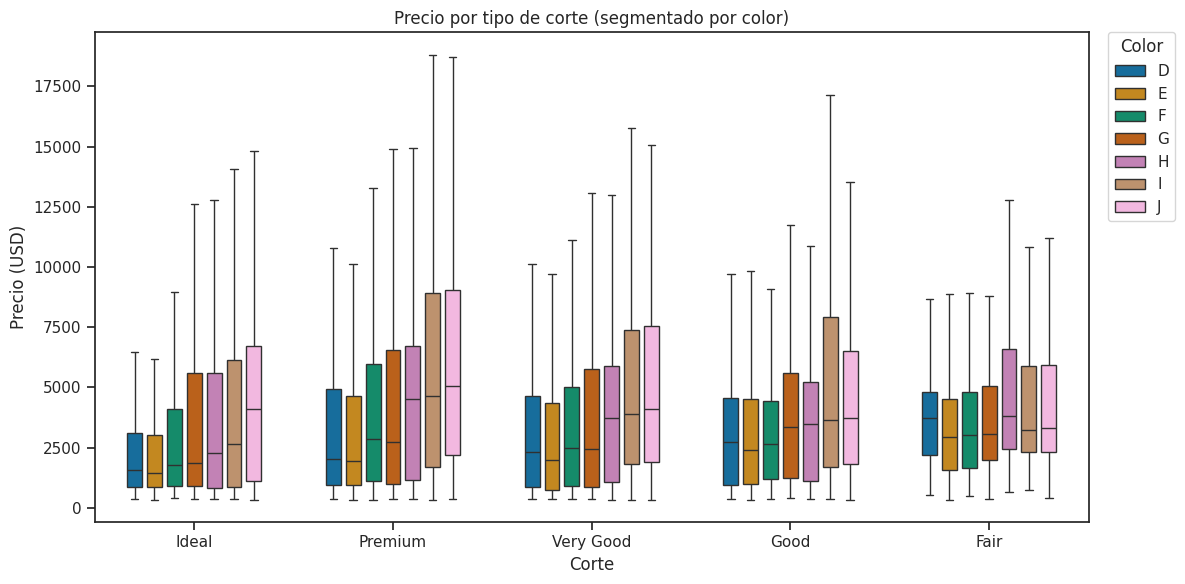

In [281]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="cut", y="price",
    hue="color",
    palette="colorblind",
    showfliers=False,
    width=0.7, gap=0.25,
    ax=ax
)

ax.set_title("Precio por tipo de corte (segmentado por color)")
ax.set_xlabel("Corte")
ax.set_ylabel("Precio (USD)")

# leyenda fuera
ax.legend(title="Color", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()



4. Implemente un panel con FacetGrid combinando dos categorías.

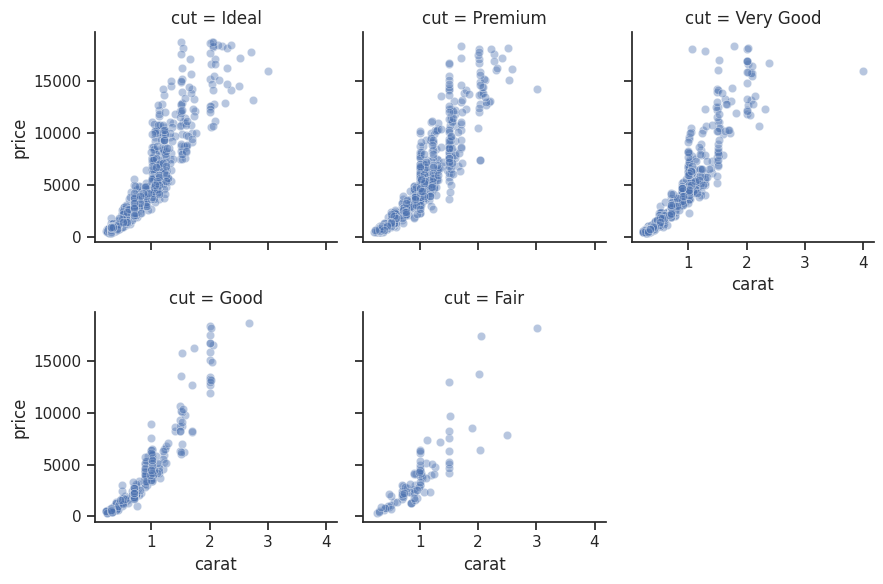

In [282]:
g = sns.FacetGrid(
    df.sample(3000),   # para que no sea tan pesado
    col="cut",
    col_wrap=3,
    height=3
)

g.map_dataframe(
    sns.scatterplot,
    x="carat",
    y="price",
    alpha=0.4
)

g.set_titles(col_template="cut = {col_name}")
plt.show()


5. Calcule la matriz de correlación con .corr() y visualizala con sns.heatmap().

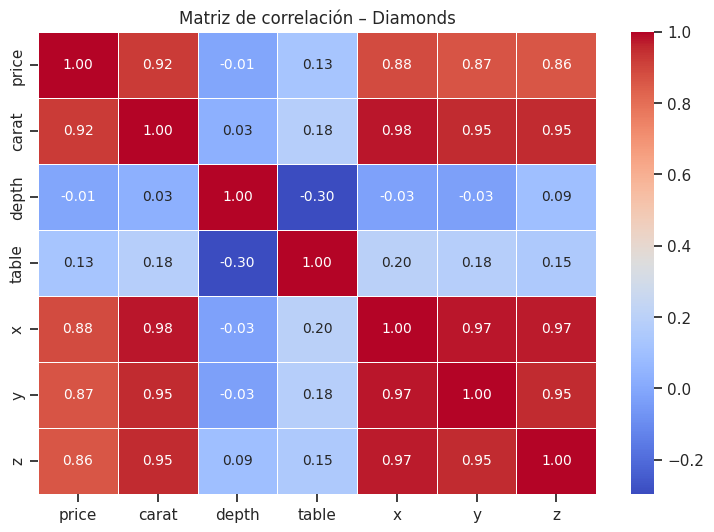

In [283]:
num_df = df[["price", "carat", "depth", "table", "x", "y", "z"]]
corr = num_df.corr()

plt.figure(figsize=(9,6))
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"size": 10},
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Matriz de correlación – Diamonds")
plt.show()

6. Aplique estilo visual (sns.set_theme() y sns.set_context()).

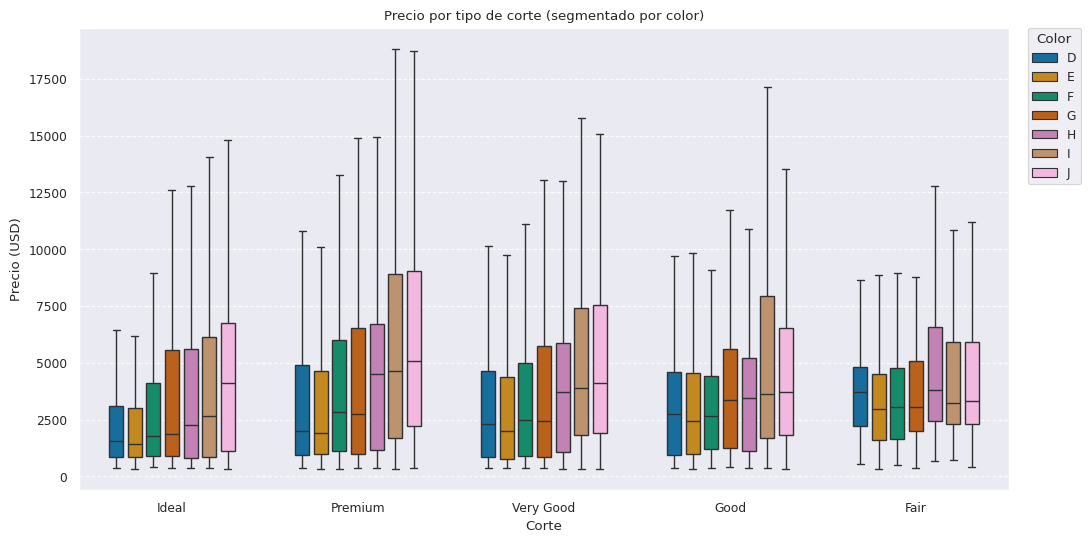

In [284]:
sns.set_theme(style="darkgrid")           # "white", "darkgrid", "ticks"
sns.set_context("paper", font_scale=1.0)  # "paper", "talk", "poster"
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="cut", y="price",
    hue="color",
    palette="colorblind",
    showfliers=False,
    width=0.7, gap=0.25,
    ax=ax
)

ax.set_title("Precio por tipo de corte (segmentado por color)")
ax.set_xlabel("Corte")
ax.set_ylabel("Precio (USD)")
ax.yaxis.grid(True, linestyle="--", alpha=0.9)
ax.xaxis.grid(False)

# leyenda fuera
ax.legend(title="Color", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

plt.show()


7. Guarde uno de los gráficos con plt.savefig("grafico.png").


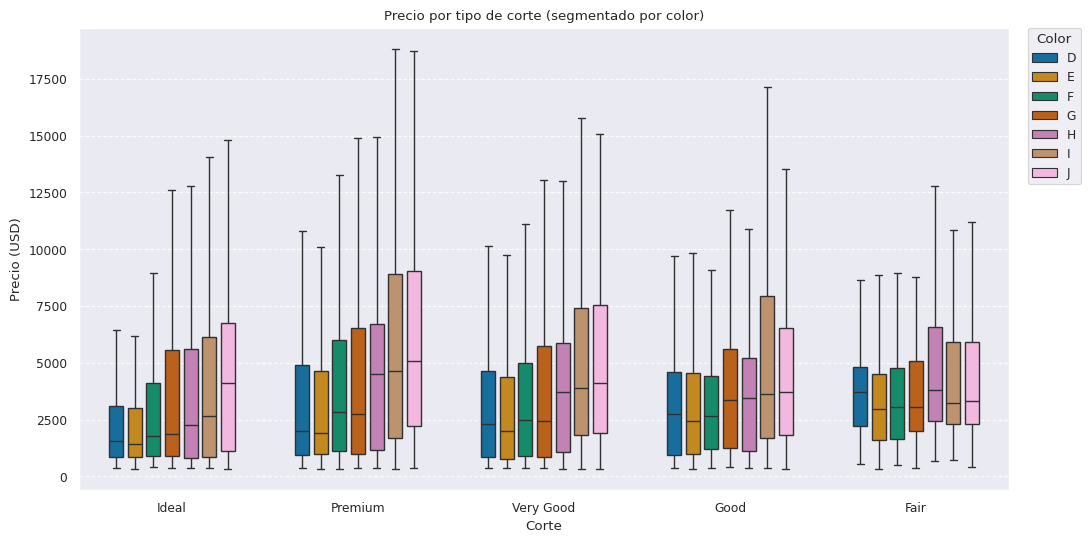

In [285]:
sns.set_theme(style="darkgrid")           # "white", "darkgrid", "ticks"
sns.set_context("paper", font_scale=1.0)  # "paper", "talk", "poster"
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="cut", y="price",
    hue="color",
    palette="colorblind",
    showfliers=False,
    width=0.7, gap=0.25,
    ax=ax
)

ax.set_title("Precio por tipo de corte (segmentado por color)")
ax.set_xlabel("Corte")
ax.set_ylabel("Precio (USD)")
ax.yaxis.grid(True, linestyle="--", alpha=0.9)
ax.xaxis.grid(False)

# leyenda fuera
ax.legend(title="Color", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.savefig(
    "diamonds_price_vs_carat.png",
    dpi=150,
    bbox_inches="tight"
)


8. Analice en texto breve qué patrones o relaciones descubriste visualmente.